In [280]:
import pandas as pd

In [281]:
df = pd.read_csv('startup_funding.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


# Funding Trend with years

In [282]:
import matplotlib.pyplot as plt

In [283]:
df1 = df.copy()
df1['year'] = df1.Date.apply(lambda x:int(x[-4:]))

In [284]:
df1.year.value_counts().sort_index()

2015    936
2016    993
2017    443
Name: year, dtype: int64

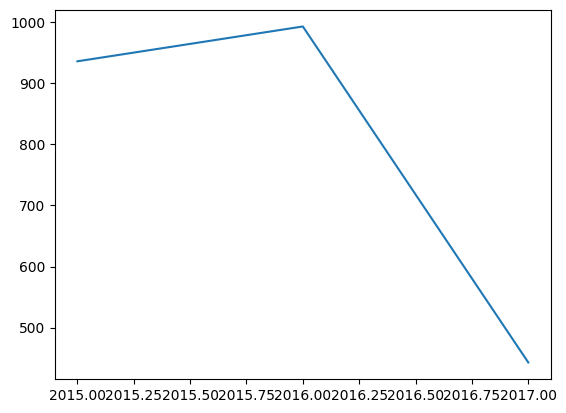

In [285]:
plt.plot(df1.year.value_counts().sort_index())

# which city should be choosen for starting a startup

top 10 cities for startup

In [286]:
df1.CityLocation.dropna(inplace=True)

In [287]:
df1.shape

(2372, 11)

In [288]:
df1.dropna(subset = 'CityLocation',inplace=True)

In [289]:
df1.CityLocation.value_counts().index

Index(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Pune', 'Noida',
       'Hyderabad', 'Chennai', 'Ahmedabad', 'Jaipur', 'Kolkata', 'Chandigarh',
       'Vadodara', 'Indore', 'Goa', 'Singapore', 'Kanpur', 'Pune / US',
       'Delhi', 'Coimbatore', 'Udupi', 'Bhopal', 'Siliguri', 'Bangalore / SFO',
       'Kochi', 'Gwalior', 'Agra', 'New Delhi / US', 'Trivandrum',
       'Bangalore/ Bangkok', 'Bangalore / San Mateo', 'Noida / Singapore',
       'Goa/Hyderabad', 'Belgaum', 'USA/India', 'Chennai/ Singapore',
       'Pune / Singapore', 'Udaipur', 'New Delhi / California',
       'New York/ India', 'India / US', 'US/India', 'Gurgaon / SFO',
       'Bangalore / USA', 'New Delhi/ Houston', 'Bangalore / Palo Alto',
       'Nagpur', 'Mumbai / Global', 'Mumbai / NY', 'Lucknow', 'Boston', 'US',
       'bangalore', 'Surat', 'Missourie', 'Panaji', 'Karur', 'Hubli', 'Kerala',
       'Kozhikode', 'USA', 'Hyderabad/USA', 'SFO / Bangalore', 'London',
       'Seattle / Bangalore', 'Pune/Seattle', 'Pu

In [290]:
df1.CityLocation = df1.CityLocation.apply(lambda x:x.split('/')[0])

In [291]:
df1.CityLocation.unique()

array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'bangalore', 'Trivandrum',
       'Chennai', 'Chandigarh', 'Jaipur', 'Vadodara', 'Surat',
       'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Indore', 'Singapore', 'Goa', 'Agra', 'Hubli', 'Delhi', 'Kerala',
       'Kozhikode', 'US', 'Coimbatore', 'Siliguri', 'USA', 'Lucknow',
       'Kanpur', 'SFO ', 'London', 'Seattle ', 'Pune ', 'Bangalore ',
       'Varanasi', 'Bhopal', 'New Delhi ', 'Mumbai ', 'Jodhpur', 'Boston',
       'Noida ', 'Belgaum', 'New York', 'Gurgaon ', 'Nagpur', 'India ',
       'Udaipur', 'Dallas '], dtype=object)

In [292]:
replace_values = {'Bangalore':'Bangalore ', 'Gurgaon':'Gurgaon ','Pune':'Pune ' }
# df1.CityLocation = df1.CityLocation.str.replace(replace_values)

In [293]:
for old_value, new_value in replace_values.items():
    df['CityLocation'] = df['CityLocation'].str.replace(old_value, new_value)

In [294]:
df1.CityLocation = df1.CityLocation.str.replace('Delhi','New Delhi')
df1.CityLocation = df1.CityLocation.str.replace('New Delhi ','New Delhi')

In [295]:
df1.CityLocation = df1.CityLocation.str.replace('New New Delhi','New Delhi')

In [296]:
df1.CityLocation.unique()

array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'bangalore', 'Trivandrum',
       'Chennai', 'Chandigarh', 'Jaipur', 'Vadodara', 'Surat',
       'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Indore', 'Singapore', 'Goa', 'Agra', 'Hubli', 'Kerala',
       'Kozhikode', 'US', 'Coimbatore', 'Siliguri', 'USA', 'Lucknow',
       'Kanpur', 'SFO ', 'London', 'Seattle ', 'Pune ', 'Bangalore ',
       'Varanasi', 'Bhopal', 'Mumbai ', 'Jodhpur', 'Boston', 'Noida ',
       'Belgaum', 'New York', 'Gurgaon ', 'Nagpur', 'India ', 'Udaipur',
       'Dallas '], dtype=object)

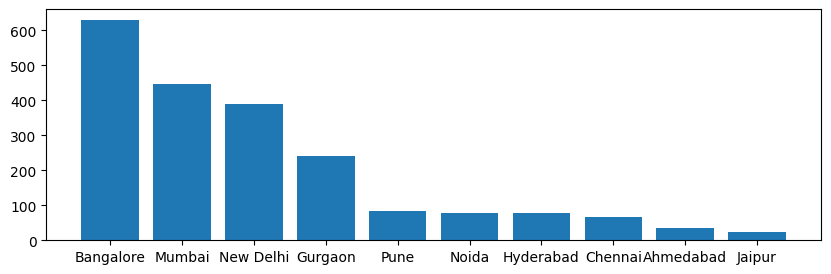

In [297]:
plt.figure(figsize=(10,3))
plt.bar(df1.CityLocation.value_counts()[:10].index, df1.CityLocation.value_counts()[:10].values)
plt.show()

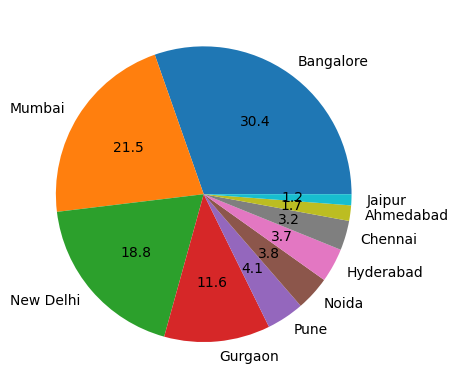

In [298]:
plt.pie(df1.CityLocation.value_counts()[:10].values, labels = df1.CityLocation.value_counts()[:10].index,autopct="%0.1f")
plt.show()

# top 10 cities in which funding amount is recieved

In [299]:
df1.AmountInUSD = df1.AmountInUSD.str.replace(',','').astype(float)

In [300]:
df1.groupby(by = 'CityLocation')['AmountInUSD'].sum().sort_values(ascending = False)[:10]

CityLocation
Bangalore    8.393674e+09
New Delhi    2.818248e+09
Mumbai       2.343694e+09
Gurgaon      2.067822e+09
Chennai      4.111050e+08
Pune         2.971530e+08
Hyderabad    1.953620e+08
Noida        1.703380e+08
Ahmedabad    9.818600e+07
Pune         6.950000e+07
Name: AmountInUSD, dtype: float64

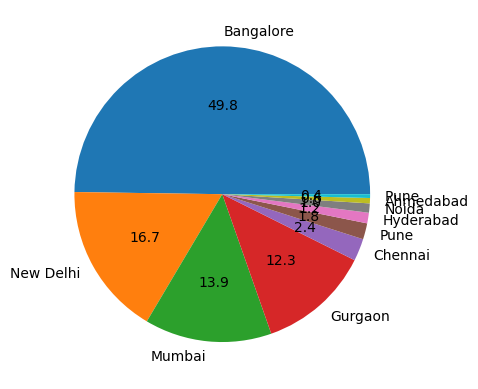

In [301]:
plt.pie(df1.groupby(by = 'CityLocation')['AmountInUSD'].sum().sort_values(ascending = False)[:10].values
        , labels=df1.groupby(by = 'CityLocation')['AmountInUSD'].sum().sort_values(ascending = False)[:10].index,
        autopct= '%.1f',)
plt.show()

# types of investment and amount of funds for each type of investment

In [302]:
df1.groupby(by = 'InvestmentType')['AmountInUSD'].sum()

InvestmentType
Debt Funding      7.800000e+06
Private Equity    1.676941e+10
Seed Funding      2.983126e+08
Name: AmountInUSD, dtype: float64

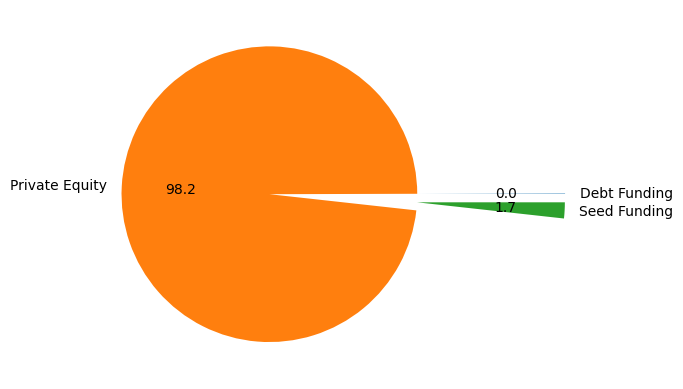

In [303]:
plt.pie(df1.groupby(by = 'InvestmentType')['AmountInUSD'].sum().values,
       labels=df1.groupby(by = 'InvestmentType')['AmountInUSD'].sum().index,
       autopct='%.1f', explode = [1,0,1])
plt.show()

# which industry gets more amount of funding

In [304]:
df1.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[:10]

IndustryVertical
Consumer Internet                     3.797036e+09
eCommerce                             2.442712e+09
ECommerce                             1.834398e+09
Technology                            1.103594e+09
Online Marketplace                    7.000000e+08
E-Commerce & M-Commerce platform      6.800000e+08
Car Aggregator & Retail Mobile App    5.000000e+08
Ecommerce Marketplace                 5.000000e+08
Cab Aggregator                        4.000000e+08
Cab rental Mobile app                 2.250000e+08
Name: AmountInUSD, dtype: float64

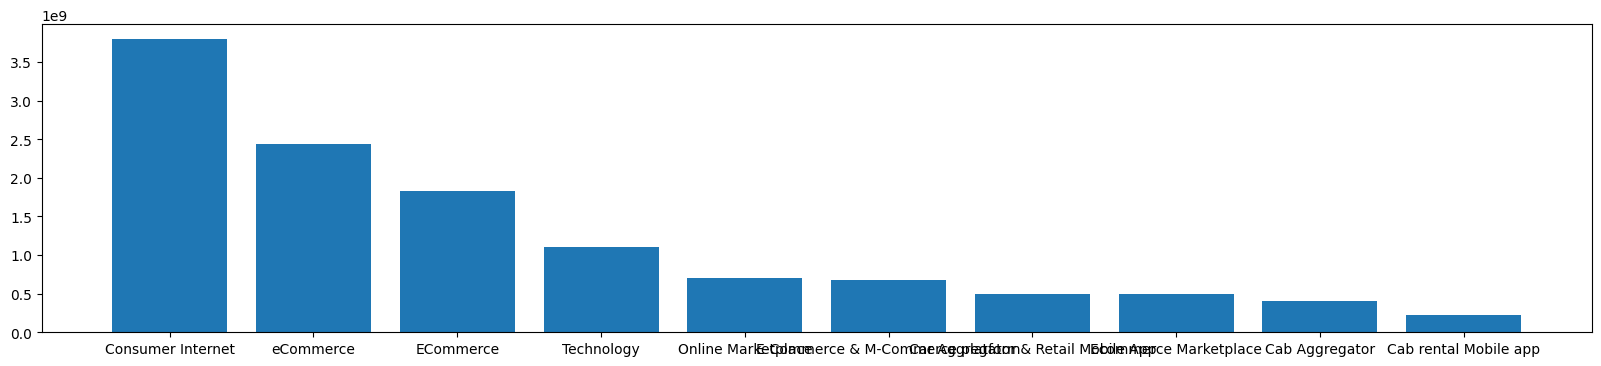

In [305]:
plt.figure(figsize= (20,4))
plt.bar(df1.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[:10].index,
       df1.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[:10].values)
plt.show()

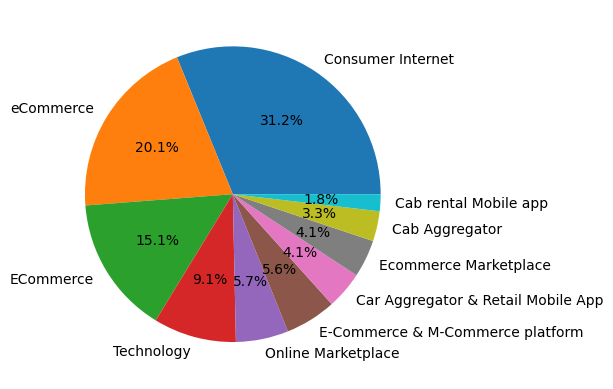

In [306]:
plt.pie(df1.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[:10].values,
       labels = df1.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[:10].index,
       autopct = '%.1f%%')
plt.show()

# top 10 investors, who have invested max amount

In [307]:
df1.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks', 'year'],
      dtype='object')

In [308]:
df1.groupby('InvestorsName')['AmountInUSD'].sum().sort_values(ascending = False)

InvestorsName
SoftBank Group                                                                         1.462000e+09
Microsoft, eBay, Tencent Holdings                                                      1.400000e+09
Steadview Capital and existing investors                                               7.000000e+08
Alibaba Group, Ant Financial                                                           6.800000e+08
Alibaba, Foxconn, Softbank                                                             5.000000e+08
                                                                                           ...     
Ritesh Dwivedy, Priti Padhy                                                            0.000000e+00
Harinder Takhar, Zain Raj, Dr. Prasad Kaipa, Abaran Deep, Aseem Sood, Mustafa Patni    0.000000e+00
Hamraj Kumar                                                                           0.000000e+00
Robin Utthappa                                                                        

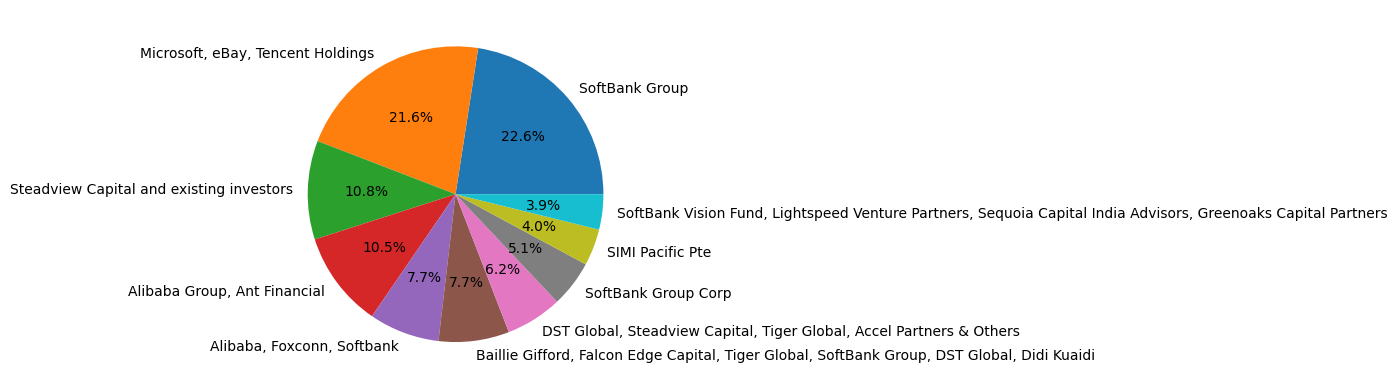

In [309]:
plt.pie(df1.groupby('InvestorsName')['AmountInUSD'].sum().sort_values(ascending = False)[:10].values,
       labels = df1.groupby('InvestorsName')['AmountInUSD'].sum().sort_values(ascending = False)[:10].index,
       autopct = '%.1f%%')
plt.show()

# Top 10 investors who invested max times

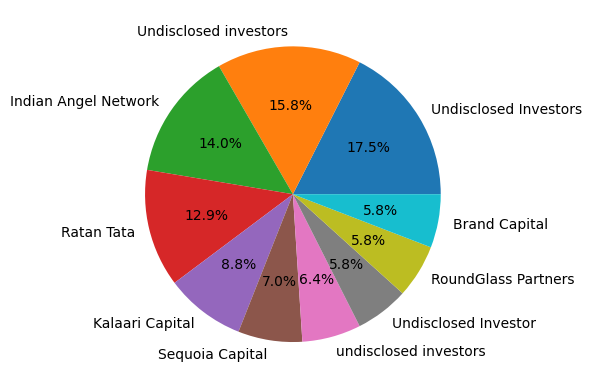

In [310]:
plt.pie(df1.InvestorsName.value_counts()[:10].values,
        labels=df1.InvestorsName.value_counts()[:10].index,
       autopct='%.1f%%')
plt.show()

# problem 1:
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations - Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [311]:
df1.CityLocation.unique()

array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'bangalore', 'Trivandrum',
       'Chennai', 'Chandigarh', 'Jaipur', 'Vadodara', 'Surat',
       'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Indore', 'Singapore', 'Goa', 'Agra', 'Hubli', 'Kerala',
       'Kozhikode', 'US', 'Coimbatore', 'Siliguri', 'USA', 'Lucknow',
       'Kanpur', 'SFO ', 'London', 'Seattle ', 'Pune ', 'Bangalore ',
       'Varanasi', 'Bhopal', 'Mumbai ', 'Jodhpur', 'Boston', 'Noida ',
       'Belgaum', 'New York', 'Gurgaon ', 'Nagpur', 'India ', 'Udaipur',
       'Dallas '], dtype=object)

In [312]:
df1['CityLocation'] = df1['CityLocation'].replace( {'New Delhi':'NCR',
                              'Gurgaon':'NCR',
                              'Noida':'NCR',
                              'Noida ':'NCR',
                              'Gurgaon ':'NCR',
                             'Bangalore ':'Bangalore',
                             'bangalore':'Bangalore',
                             })

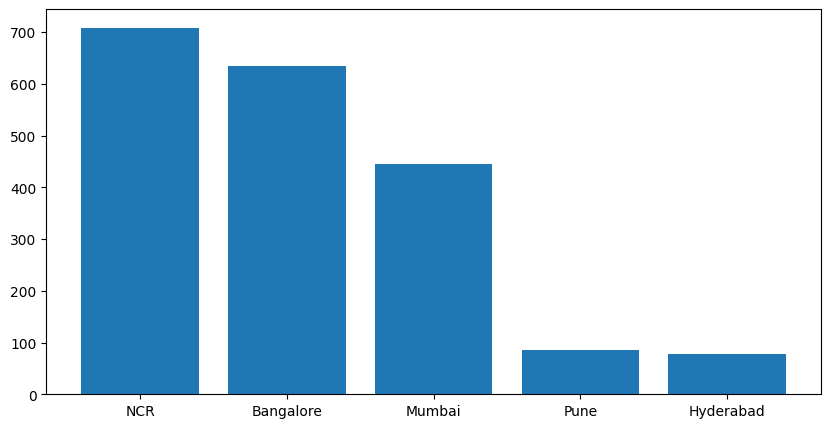

In [313]:
plt.figure(figsize = (10,5))
plt.bar(df1.CityLocation.value_counts()[:5].index,df1.CityLocation.value_counts()[:5].values)
plt.show()

## <font color="Red">NCR and Bangalore would be a better option to invest in</font>

In [314]:
df1.CityLocation.value_counts()[:5].values

array([709, 635, 446,  85,  77], dtype=int64)

# Problem 2 :
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [315]:
df1['InvestorsName'].apply(lambda x: str(x).split(',')).values

array([list(['Kae Capital']), list(['Triton Investment Advisors']),
       list(['Kashyap Deorah', ' Anand Sankeshwar', ' Deepak Jain', ' Sadashiva NT', ' Arjun Mehta', ' Satish Kaul', ' Anindya Ghose']),
       ..., list(['Rainmatter']), list(['The HR Fund']),
       list(['Bessemer Venture Partners', ' SAIF Partners'])],
      dtype=object)

In [316]:
dic = {}
for i in df1['InvestorsName'].apply(lambda x: str(x).split(',')).values :
    for j in i:
        if j.strip() in dic:
            dic[j.strip()]+=1
        else:
            dic[j.strip()] = 1

In [317]:
# del dic['']
sorted_dic = dict(sorted(dic.items(), key = lambda x:x[1], reverse = True)[:6])

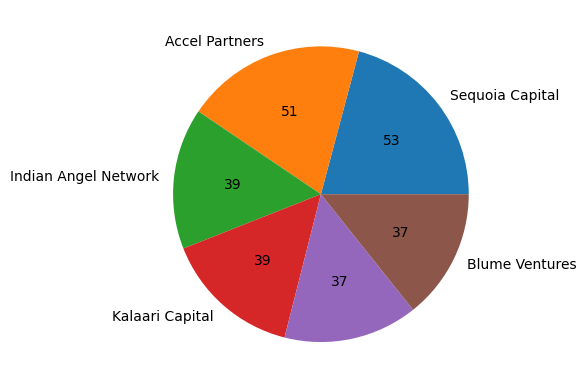

In [318]:
plt.pie(sorted_dic.values(),
        labels = sorted_dic.keys(),
       autopct = lambda x:int(x*(sum(sorted_dic.values()))/100))
plt.show()

# Problem 3 :
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [319]:
df1.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks', 'year'],
      dtype='object')

In [320]:
df1[df1['StartupName'].str.contains(r'paytm', case = False)]['StartupName'].unique()

array(['Paytm', 'Paytm Marketplace'], dtype=object)

In [321]:
df1[df1['StartupName'].str.contains(r'flipkar', case = False)]['StartupName'].unique()

array(['Flipkart', 'Flipkart.com'], dtype=object)

In [322]:
df1[df1['StartupName'].str.contains(r'ola', case = False)]['StartupName'].unique()

array(['Ola', 'Ola Cabs', 'HolaChef', 'Oriano Solar', 'Truckola',
       'SolarTown', 'Kolabro', 'EzySolare', 'Applied Solar Technologies',
       'Holachef', 'Olacabs'], dtype=object)

In [323]:
df1[df1['StartupName'].str.contains(r'oyo', case = False)]['StartupName'].unique()

array(['Oyo Rooms', 'FroyoFit', 'OyoRooms', 'Oyo', 'OYOfit', 'Oyorooms'],
      dtype=object)

In [330]:
replacement = {'Oyo':['Oyo Rooms', 'OyoRooms', 'oyo', 'OYOfit', 'Oyorooms'],
               'Ola': ['Ola', 'Ola Cabs'],
               'Flipkart':'Flipkart.com',
               'Paytm': 'Paytm Marketplace'
              }
for i in replacement:
    df1['StartupName'] = df1['StartupName'].replace(replacement[i],i)

In [333]:
df1.groupby(by= 'StartupName')['InvestorsName'].count()

StartupName
121Policy               1
1Crowd                  1
1mg                     3
1mg (Healthkartplus)    1
33Coupons               1
                       ..
trueHb                  1
underDOGS               1
vImmune                 1
vPhrase Analytics       1
wayForward              1
Name: InvestorsName, Length: 1865, dtype: int64